In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set the no of columns to be displayed to 500
pd.set_option('display.max_columns', 500)

# Set the no of rows to be displayed to 200
pd.set_option('display.max_rows', 300)

import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score , roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
import os
import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
# Reading the data into the python
df_telecom = pd.read_csv(r'C:\Users\tabish\Downloads\telecom_churn_data.csv')

In [3]:
df_telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking the shape of dataframe
df_telecom.shape

(99999, 226)

In [5]:
# Checking the datatype of each variables
df_telecom.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
# Checking the percentile of dataframe
df_telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# Dropping the duplicates if any
df_telecom = df_telecom.drop_duplicates()
df_telecom.shape

(99999, 226)

# Data Cleaning

In [8]:
# Checking for unique values
df_telecom.nunique().sort_values(ascending = False)

mobile_number               99999
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
total_og_mou_7              40477
total_og_mou_6              40327
total_og_mou_8              40074
total_og_mou_9              39160
total_ic_mou_6              32247
total_ic_mou_7              32242
total_ic_mou_8              32128
total_ic_mou_9              31260
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
loc_ic_mou_6                28569
loc_ic_mou_7                28390
loc_ic_mou_8                28200
std_og_mou_7                27951
loc_ic_mou_9                27697
std_og_mou_6                27502
std_og_mou_8                27491
std_og_mou_9                26553
loc_og_mou_6                26372
loc_og_mou_7                26091
loc_og_mou_8                25990
loc_og_mou_9                25376
onnet_mou_7   

In [9]:
# Checking the missing values
df_telecom.isnull().sum().sort_values(ascending = False)

count_rech_2g_6             74846
date_of_last_rech_data_6    74846
count_rech_3g_6             74846
av_rech_amt_data_6          74846
max_rech_data_6             74846
total_rech_data_6           74846
arpu_3g_6                   74846
arpu_2g_6                   74846
night_pck_user_6            74846
fb_user_6                   74846
arpu_3g_7                   74428
count_rech_2g_7             74428
fb_user_7                   74428
count_rech_3g_7             74428
arpu_2g_7                   74428
av_rech_amt_data_7          74428
max_rech_data_7             74428
night_pck_user_7            74428
total_rech_data_7           74428
date_of_last_rech_data_7    74428
night_pck_user_9            74077
date_of_last_rech_data_9    74077
fb_user_9                   74077
arpu_2g_9                   74077
max_rech_data_9             74077
arpu_3g_9                   74077
total_rech_data_9           74077
av_rech_amt_data_9          74077
count_rech_3g_9             74077
count_rech_2g_

In [10]:
round(df_telecom.isnull().sum() / len(df_telecom.index) * 100).sort_values(ascending = False)


max_rech_data_6             75.0
count_rech_3g_6             75.0
av_rech_amt_data_6          75.0
date_of_last_rech_data_6    75.0
arpu_3g_6                   75.0
fb_user_6                   75.0
count_rech_2g_6             75.0
night_pck_user_6            75.0
arpu_2g_6                   75.0
total_rech_data_6           75.0
arpu_3g_8                   74.0
arpu_3g_7                   74.0
total_rech_data_7           74.0
arpu_3g_9                   74.0
date_of_last_rech_data_7    74.0
date_of_last_rech_data_8    74.0
date_of_last_rech_data_9    74.0
total_rech_data_9           74.0
total_rech_data_8           74.0
av_rech_amt_data_9          74.0
arpu_2g_7                   74.0
av_rech_amt_data_7          74.0
count_rech_3g_9             74.0
count_rech_3g_8             74.0
count_rech_3g_7             74.0
count_rech_2g_9             74.0
count_rech_2g_8             74.0
count_rech_2g_7             74.0
max_rech_data_9             74.0
max_rech_data_8             74.0
av_rech_am

 ### Impute the columns such as total_rech_data_6, total_rech_data_7, av_rech_amt_data_6, av_rech_amt_data_7 etc with zero

In [11]:
df_telecom['total_rech_data_6'] = df_telecom['total_rech_data_6'].fillna(0)
df_telecom['total_rech_data_7'] = df_telecom['total_rech_data_7'].fillna(0)
df_telecom['av_rech_amt_data_6'] = df_telecom['av_rech_amt_data_6'].fillna(0)
df_telecom['av_rech_amt_data_7'] = df_telecom['av_rech_amt_data_7'].fillna(0)

In [12]:
# Dropping all the columns having missing values greater than 70%
df_telecom = df_telecom.loc[:,df_telecom.columns[round((df_telecom.isnull().sum(axis = 0)/len(df_telecom.index)*100),2) < 70]]
df_telecom.shape

(99999, 190)

In [13]:
# Imputing the rest with median values
df_telecom = df_telecom.fillna(df_telecom.median())

In [14]:
#Putting all the date columns in to the list 
date_cols = df_telecom.columns[df_telecom.columns.str.contains('date')].tolist()

# Dropping all the columns in the list
df_telecom = df_telecom.drop(date_cols, axis = 1)

# checking the shape after dropping the columns
df_telecom.shape

(99999, 182)

In [15]:
# Now again checking the missing values after treating them
round(df_telecom.isnull().sum() / len(df_telecom.index) * 100).sort_values(ascending = False)

sep_vbc_3g            0.0
isd_og_mou_8          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
std_og_t2m_mou_8      0.0
std_og_t2m_mou_7      0.0
std_og_t2m_mou_6      0.0
std_og_t2t_mou_9      0.0
std_og_t2t_mou_8      0.0
isd_og_mou_7          0.0
isd_og_mou_9          0.0
std_og_t2t_mou_6      0.0
spl_og_mou_6          0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_mou_7      0.0
loc_ic_t2m_mou_6      0.0
loc_ic_t2t_mou_9      0.0
loc_ic_t2t_mou_8      0.0
loc_ic_t2t_mou_7      0.0
loc_ic_t2t_mou_6      0.0
total_og_mou_9        0.0
total_og_mou_8        0.0
total_og_mou_7        0.0
total_og_mou_6        0.0
og_others_9           0.0
og_others_8 

##### It can be seen that there is no missing values present

In [16]:

# Dropping the mobile number
df_telecom = df_telecom.drop(['mobile_number', 'circle_id'], axis = 1)
df_telecom.shape

(99999, 180)

##### Making new columns to filter High Value Customer

In [17]:
# Combining the data and call columns into one column for month 6
df_telecom['Data_Call_6'] = df_telecom['total_rech_amt_6'] + (df_telecom['total_rech_data_6'] * df_telecom['av_rech_amt_data_6'])

# # Combining the data and call columns into one column for month 7
df_telecom['Data_Call_7'] = df_telecom['total_rech_amt_7'] + (df_telecom['total_rech_data_7'] * df_telecom['av_rech_amt_data_7'])

# Adding the Data and call for 6th and 7th
df_telecom['Average_Data_Call'] = (df_telecom['Data_Call_7'] + df_telecom['Data_Call_6']) / 2

In [18]:
df_telecom.shape

(99999, 183)

In [19]:
# Dropping original columns
df_telecom = df_telecom.drop(['Data_Call_6', 'total_rech_amt_6', 'total_rech_data_6', 'av_rech_amt_data_6', 'Data_Call_7', 'total_rech_amt_7', 'total_rech_data_7', 'av_rech_amt_data_7'], axis = 1)
df_telecom.shape

(99999, 175)

# Derived Features

In [20]:
# for month 6
df_telecom['Total_MOU_6'] = df_telecom['total_og_mou_6'] + df_telecom['total_ic_mou_6']

# for month 7
df_telecom['Total_MOU_7'] = df_telecom['total_og_mou_7'] + df_telecom['total_ic_mou_7']


In [21]:
df_telecom['Monthly_2g_3g_6'] = df_telecom['monthly_2g_6'] + df_telecom['monthly_3g_6']

# for month 7
df_telecom['Monthly_2g_3g_7'] = df_telecom['monthly_2g_7'] + df_telecom['monthly_3g_7']


In [22]:
# Dropping original columns
df_telecom = df_telecom.drop(['total_og_mou_6', 'total_ic_mou_6', 'total_og_mou_7', 'total_ic_mou_7', 'monthly_2g_6', 'monthly_3g_6', 'monthly_2g_7', 'monthly_3g_7'], axis = 1)

# checking the shape of dataframe
df_telecom.shape

(99999, 171)

## Filtering the High Value Customer


In [23]:
#length of the dataframe after filtering out high valued customers
len(df_telecom[df_telecom['Average_Data_Call'] >= round(df_telecom['Average_Data_Call'].quantile(0.7))].index)

30001

In [24]:
# Making dataframe of high value customer
High_Value_Cust = df_telecom[df_telecom['Average_Data_Call'] >= round(df_telecom['Average_Data_Call'].quantile(0.7))]
High_Value_Cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,559.0,0.00,0.00,1,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.910,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.760,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.0,15.74,15.

In [25]:
# Checking the shape of High Value Customer
High_Value_Cust.shape

(30001, 171)

## Outlier Analysis

In [26]:
Q1=High_Value_Cust.Average_Data_Call.quantile(0.25)
Q3=High_Value_Cust.Average_Data_Call.quantile(0.75)
IQR=Q3-Q1
High_Value_Cust=High_Value_Cust[(High_Value_Cust.Average_Data_Call>=Q1-1.5*IQR)&(High_Value_Cust.Average_Data_Call<=Q3+1.5*IQR)]

In [27]:
# checking the shape after outlier treatment
High_Value_Cust.shape

(27360, 171)

##### Outliers are removed from single column Average_Data_Call otherwise we will lose a many data which is not great for modelling

## Predicting Churn


In [28]:
High_Value_Cust['Churn'] = (High_Value_Cust['total_ic_mou_9'] == 0) & (High_Value_Cust['total_og_mou_9'] == 0) \
                             & (High_Value_Cust['vol_2g_mb_9'] == 0) & (High_Value_Cust['vol_3g_mb_9'] == 0)
High_Value_Cust['Churn'] = High_Value_Cust['Churn'].apply(lambda x : 1 if x else 0)
High_Value_Cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7,Churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,5.44,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,4,3,2,6,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,559.0,0.00,0.00,1,1,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.160,325.91,87.29,16.23,33.49,31.64,0.0,23.74,12.59,38.06,0.0,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.0,0.0,0.00,0.00,422.16,533.910,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.760,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.5,0.0,6.50,0.00,0.0,0.0,0.0,0.0,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.0,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,428.74,0.00,0.21,0.0,0.0,0.0,2.06,14.53,31.59,0.0,1

In [29]:
# Churn rate for high valued customers
High_Value_Cust['Churn'].sum()/len(High_Value_Cust.index)

0.08267543859649122

In [30]:
# Putting the 9th month columns to the list 
churn_cols = High_Value_Cust.columns[High_Value_Cust.columns.str.contains('_9')].tolist()

# Dropping attributes with 9th month in it
High_Value_Cust = High_Value_Cust.drop(churn_cols,axis=1)

# Checking the shape
High_Value_Cust.shape

(27360, 130)

In [31]:
# Checking the info
High_Value_Cust.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27360 entries, 0 to 99997
Data columns (total 130 columns):
 #   Column              Dtype  
---  ------              -----  
 0   loc_og_t2o_mou      float64
 1   std_og_t2o_mou      float64
 2   loc_ic_t2o_mou      float64
 3   arpu_6              float64
 4   arpu_7              float64
 5   arpu_8              float64
 6   onnet_mou_6         float64
 7   onnet_mou_7         float64
 8   onnet_mou_8         float64
 9   offnet_mou_6        float64
 10  offnet_mou_7        float64
 11  offnet_mou_8        float64
 12  roam_ic_mou_6       float64
 13  roam_ic_mou_7       float64
 14  roam_ic_mou_8       float64
 15  roam_og_mou_6       float64
 16  roam_og_mou_7       float64
 17  roam_og_mou_8       float64
 18  loc_og_t2t_mou_6    float64
 19  loc_og_t2t_mou_7    float64
 20  loc_og_t2t_mou_8    float64
 21  loc_og_t2m_mou_6    float64
 22  loc_og_t2m_mou_7    float64
 23  loc_og_t2m_mou_8    float64
 24  loc_og_t2f_mou_6    float64

## UNIVARIATE AND BIVARIATE ANALYSIS

In [32]:
# Create function for Univariate Analysis
def plot(lvar):
    print(High_Value_Cust[lvar].describe())
    plt.figure(figsize = (10, 8))
    sns.distplot(High_Value_Cust[lvar])
    plt.title('Univariate Analysis of Variable ' + lvar, fontsize = 15)
    plt.show()

In [33]:
# Create function for Bivariate Analysis
def plot_bivariate(lvar1, lvar2):
    plt.figure(figsize = (10, 8))
    sns.boxplot(lvar1, lvar2, data = High_Value_Cust)
    plt.title('Bivariate Analysis of Variables ' + lvar1 + 'And ' + lvar2, fontsize = 15)
    plt.show()

### Univariate Analysis

count    27360.000000
mean       879.413611
std        376.834274
min        478.000000
25%        589.375000
50%        756.000000
75%       1060.000000
max       2115.000000
Name: Average_Data_Call, dtype: float64


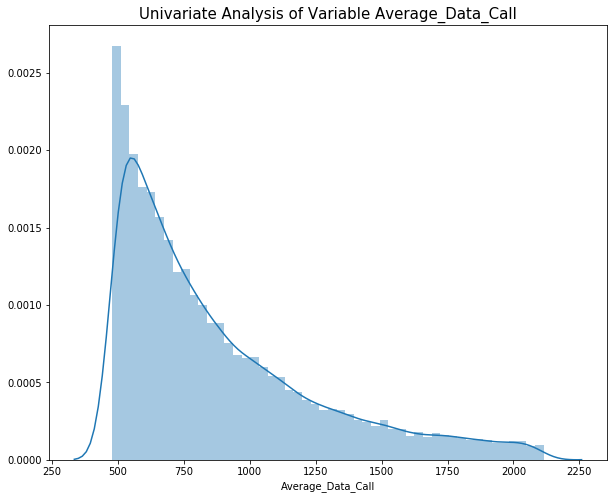

In [34]:
plot('Average_Data_Call')

count    27360.000000
mean       921.889934
std        809.236528
min          0.000000
25%        312.185000
50%        767.070000
75%       1297.895000
max       8995.240000
Name: Total_MOU_7, dtype: float64


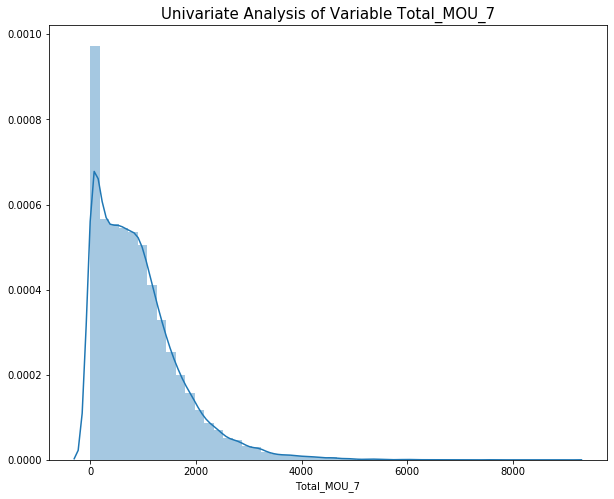

In [35]:
plot('Total_MOU_7')           

count    27360.000000
mean       243.744223
std        547.360855
min          0.000000
25%          0.000000
50%          0.000000
75%        231.945000
max      11884.140000
Name: vol_3g_mb_6, dtype: float64


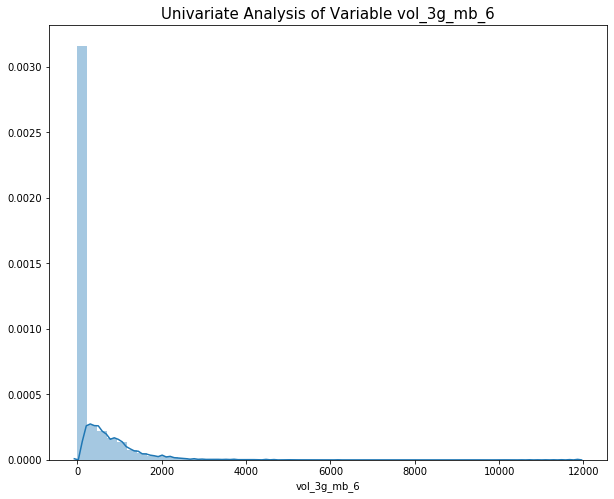

In [36]:
plot('vol_3g_mb_6')

## BIVARIATE ANALYSIS

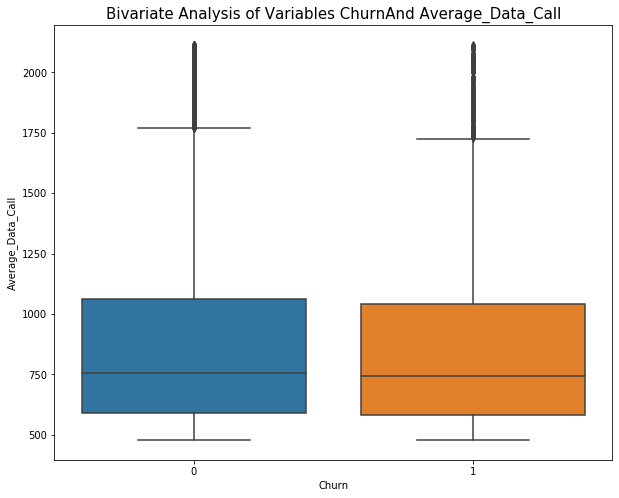

In [37]:
plot_bivariate('Churn', 'Average_Data_Call')

#### From above fig it can be seen the distribution between churn and non churn is almost same for Average_Data_Call




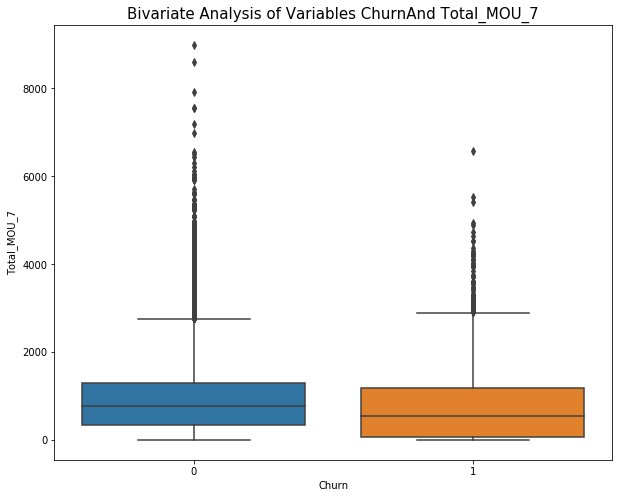

In [38]:
plot_bivariate('Churn', 'Total_MOU_7')

##### For Total_MOU_7 non churn minutes of usage are more than churn and it has gone upto 8000

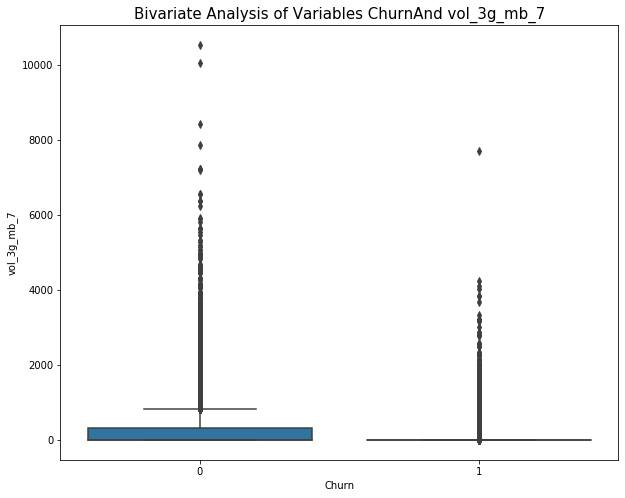

In [39]:
plot_bivariate('Churn', 'vol_3g_mb_7')

##### For Vol_3g_mb_7 the distribution is different as mean value can't be seen for both churn and non churn.

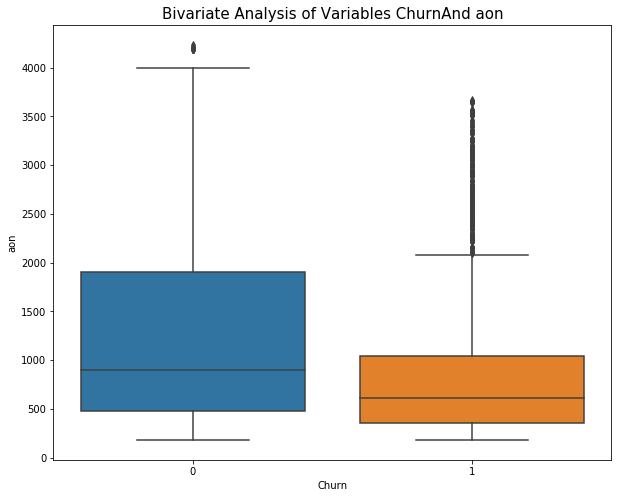

In [40]:
plot_bivariate('Churn', 'aon')

#####  For aon variable the distribution is not uniform and for non  churn the distribution is more towards above mean  and churn the distribution is almost uniform

# MODEL BUILDING

In [41]:
# Putting feature variables to X
X = High_Value_Cust.drop(['Churn'], axis = 1)

# Putting target variable to y
y = High_Value_Cust['Churn']

y.head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

In [42]:
# splitting into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [43]:
# Checking training dataset
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
18350,0.0,0.0,0.0,112.722,483.665,297.090,99.83,123.06,129.43,130.04,82.98,66.76,0.00,0.0,0.00,0.00,0.0,0.00,99.83,123.06,129.43,128.19,76.96,49.88,0.00,1.36,0.00,0.0,0.00,15.91,228.03,201.39,179.31,0.00,0.00,0.00,1.85,4.65,0.96,0.0,0.0,0.0,0.0,0.0,0.0,1.85,4.65,0.96,0.0,0.0,0.0,0.00,0.00,15.91,0.0,0.0,0.0,196.19,30.13,48.99,54.53,74.74,110.76,71.59,100.18,77.41,54.48,205.06,237.18,180.61,0.00,0.00,0.00,0.00,0.00,0.00,1.03,1.99,3.59,0.0,0.0,0.0,1.03,1.99,3.59,184.49,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.96,0.28,1,4,7,359,110,252,252,110,50,86,0.00,3.36,28.23,0.0,2086.18,2240.86,0,0,0,0,3,0,0,0,2537,973.61,1371.20,1706.75,0.00,817.5,435.97,446.18,0,2
76689,0.0,0.0,0.0,349.490,544.144,512.183,9.19,4.53,3.24,228.38,280.63,258.91,0.00,0.0,0.00,0.00,0.0,0.00,9.19,4.53,3.24,228.38,280.63,258.56,0.00,0.00,0.35,0.0,0.00,0.00,237.58,285.16,262.16,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,262.16,5.98,5.46,0.00,88.86,97.44,97.01,0.00,0.00,0.00,94.84,102.91,97.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,97.01,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,20,29,34,565,30,154,154,20,20,20,0.00,994.75,101.52,0.0,0.00,0.00,1,0,0,0,0,0,0,0,563,0.00,0.00,0.00,0.00,584.0,332.42,388.07,0,1
38956,0.0,0.0,0.0,336.135,370.488,342.195,10.76,5.81,28.59,175.79,205.96,305.01,0.00,0.0,0.00,0.00,0.0,0.00,10.76,5.81,28.59,175.79,205.96,305.01,0.00,0.00,0.00,0.0,0.00,0.00,186.56,211.78,333.61,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,3.06,0.00,0.00,0.0,0.0,0.0,333.61,53.24,11.46,63.68,296.83,236.53,388.59,1.18,0.00,7.79,351.26,247.99,460.08,0.00,0.00,0.00,0.00,0.00,6.31,1.11,0.00,0.00,0.0,0.0,0.0,1.11,0.00,6.31,466.39,0.15,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,15,18,15,526,50,50,130,50,27,130,276.48,133.71,216.93,0.0,0.00,0.00,0,4,2,3,0,0,1,0,574,0.00,0.00,0.00,0.00,571.0,542.16,459.77,0,0
27753,0.0,0.0,0.0,973.113,596.654,459.854,167.46,218.31,136.34,321.79,434.54,298.41,0.00,0.0,0.00,0.00,0.0,0.00,158.59,195.56,133.24,244.21,377.73,273.26,15.36,25.46,17.96,0.0,0.00,0.00,418.18,598.76,424.48,8.86,2

In [44]:
# Checking X_test dataset
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
80774,0.0,0.0,0.0,431.815,445.252,607.196,142.68,118.89,277.53,568.34,566.08,833.18,0.00,0.00,0.0,0.00,0.00,0.0,44.84,47.63,50.41,110.86,113.06,123.34,0.06,1.08,5.18,0.00,0.00,0.00,155.78,161.78,178.94,97.83,71.26,227.11,457.41,447.29,704.64,0.00,4.63,0.00,0.0,0.0,0.0,555.24,523.19,931.76,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1110.71,87.09,53.51,72.69,157.01,229.31,176.63,3.98,6.78,3.38,248.09,289.61,252.71,2.25,1.00,3.61,39.16,35.64,5.18,0.00,0.00,0.00,0.0,0.0,0.0,41.41,36.64,8.79,261.56,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.05,18,17,22,695,65,65,77,0,20,36,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,543,0.00,0.00,0.00,0.0,504.5,1000.54,1011.24,0,0
67592,0.0,0.0,0.0,356.700,311.130,308.910,82.13,33.46,99.03,176.39,178.63,83.41,96.04,0.00,0.0,12.46,0.00,0.0,69.66,33.46,99.03,161.71,173.44,83.41,0.61,0.78,0.00,14.06,4.40,0.00,231.99,207.69,182.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,14.06,5.68,1.51,1.45,0.0,0.0,183.96,160.21,17.08,187.59,907.09,893.78,343.79,62.19,304.33,37.53,1129.51,1215.19,568.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.00,0.0,0.0,0.0,0.00,0.46,0.00,568.93,0.14,0.0,0.00,0.0,0.45,0.00,0.19,0.41,0.00,8,6,5,440,200,200,200,0,0,200,0.00,14.17,18.66,0.00,138.51,102.35,1,0,0,0,0,0,0,0,2538,74.74,104.37,90.16,0.0,594.0,1377.37,1429.91,0,2
18971,0.0,0.0,0.0,559.369,320.160,339.728,247.56,98.66,92.53,796.86,507.76,388.51,0.00,0.00,0.0,0.00,0.00,0.0,247.56,78.29,92.53,693.06,420.28,356.18,9.09,11.71,0.00,18.10,0.00,0.00,949.73,510.29,448.71,0.00,20.36,0.00,76.59,75.76,32.33,0.00,0.00,0.00,0.0,0.0,0.0,76.59,96.13,32.33,0.00,0.00,0.0,20.18,3.31,2.00,4.13,0.0,0.0,483.04,225.03,83.93,17.16,334.71,391.91,302.94,114.63,230.09,233.21,674.38,705.94,553.33,0.00,0.00,6.23,2.64,0.00,41.56,0.00,0.00,17.33,0.0,0.0,0.0,2.64,0.00,65.13,618.59,0.45,0.0,0.13,0.0,0.00,0.00,0.30,0.13,0.00,8,6,8,418,128,169,169,128,41,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,1399,0.00,0.00,0.00,0.0,518.0,1728.42,1315.82,0,0
6912,0.0,0.0,0.0,289.895,663.594,642.925,8.33,5.76,7.98,80.18,101.83,47.44,0.00,0.00,0.0,0.00,0.00,0.0,8.33,5.76,0.20,75.86,89.11,41.64,0.

 ### Treating Imbalance with Smote

##### As we can seen the churn rate is only around 8% we need to balance the dataset for good results

In [45]:
# initializing smote
smt = SMOTE()

#fit the data
X_train, y_train = smt.fit_sample(X_train, y_train)

### Scaling The Data

In [46]:
# Initialiing the scaling
scaler = StandardScaler()

# Scaling the training data
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
0,0.0,0.0,0.0,-1.266702,-0.055719,-0.136826,-0.423162,-0.327716,-0.129151,-0.551966,-0.594461,-0.481963,-0.214805,-0.195351,-0.204674,-0.261018,-0.277298,-0.274149,0.149370,0.292356,0.469667,-0.057310,-0.248015,-0.282567,-0.285526,-0.203390,-0.250073,-0.26406,-0.227408,2.546237,0.031474,0.004925,0.077137,-0.487716,-0.466187,-0.344878,-0.505241,-0.468965,-0.361310,-0.14877,-0.134024,-0.115703,0.0,0.0,0.0,-0.683719,-0.643078,-0.466155,-0.111023,-0.112232,-0.065051,-0.357664,-0.374184,0.745021,-0.341483,-0.039982,-0.018992,-0.314211,-0.186249,-0.035570,0.098355,-0.291422,-0.061115,-0.173763,2.277535,1.526537,1.322368,-0.002402,0.172415,0.104603,-0.204932,-0.185184,-0.158045,-0.343020,-0.270207,-0.251985,-0.071008,-0.012091,0.158126,0.0,0.0,0.0,-0.363047,-0.301360,-0.249800,0.032779,-0.354704,-0.111058,-0.192236,-0.154509,-0.163298,-0.135375,-0.097598,-0.015917,-0.059167,-1.190229,-0.783872,-0.020655,-0.071156,-0.317893,0.653753,0.959758,0.117495,-0.287886,0.209204,-0.363300,-0.325981,-0.133862,-0.407200,3.659983,3.960425,-0.279234,-0.418097,-0.422612,-0.322649,7.707703,-0.212185,-0.206356,-0.139912,1.680118,3.192264,4.304730,5.535940,-0.110599,-0.116961,-0.602739,-0.499568,-0.469834,3.496686
1,0.0,0.0,0.0,-0.597420,0.130704,0.474619,-0.608210,-0.585240,-0.470836,-0.360956,-0.188990,0.024938,-0.214805,-0.195351,-0.204674,-0.261018,-0.277298,-0.274149,-0.322579,-0.313559,-0.281017,0.380244,0.725309,0.861611,-0.285526,-0.291566,-0.226013,-0.26406,-0.227408,-0.211943,0.060015,0.266790,0.371364,-0.487716,-0.466187,-0.344878,-0.509175,-0.479419,-0.364333,-0.14877,-0.134024,-0.115703,0.0,0.0,0.0,-0.686459,-0.650447,-0.468109,-0.111023,-0.112232,-0.065051,-0.357664,-0.374184,-0.284078,-0.341483,-0.039982,-0.018992,-0.201178,-0.345470,-0.344757,-0.334049,-0.222727,-0.131612,-0.021265,-0.311819,-0.284205,-0.262203,-0.364855,-0.312158,-0.236671,-0.204932,-0.185184,-0.158045,-0.343020,-0.270207,-0.251985,-0.136511,-0.133092,-0.108990,0.0,0.0,0.0,-0.371220,-0.315475,-0.284503,-0.262456,-0.354704,-0.111058,-0.192236,-0.154509,-0.163298,-0.135375,-0.097598,-0.103617,-0.090820,0.825917,2.050496,3.471978,0.418738,-0

In [47]:
# Scaling the test data
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Average_Data_Call,Total_MOU_6,Total_MOU_7,Monthly_2g_3g_6,Monthly_2g_3g_7
0,0.0,0.0,0.0,-0.279735,-0.238501,0.341196,-0.263417,-0.324595,0.106460,0.452966,0.435015,1.048802,-0.235616,-0.182518,-0.178698,-0.24418,-0.220871,-0.180401,-0.173650,-0.160370,-0.130696,-0.218828,-0.209777,-0.126089,-0.318905,-0.238132,-0.033230,-0.244023,-0.199927,-0.259076,-0.270037,-0.252828,-0.164366,-0.174499,-0.257618,0.205841,0.732307,0.653237,1.313074,-0.146617,0.209105,-0.140268,0.0,0.0,0.0,0.358592,0.268059,1.043345,-0.100502,-0.102532,-0.081336,-0.336552,-0.374694,-0.320259,-0.101001,-0.019987,-0.014596,0.844222,0.142143,-0.071080,0.081506,0.038255,0.375759,0.139963,-0.257670,-0.195667,-0.281433,0.063804,0.192895,0.100736,-0.217424,-0.239367,-0.191969,0.095659,0.067358,-0.203681,-0.140152,-0.142812,-0.120315,0.0,0.0,0.0,-0.025509,-0.076338,-0.262436,-0.037176,-0.383869,-0.169843,-0.245222,-0.162775,-0.161119,-0.171984,-0.069963,-0.073983,-0.072991,0.686817,0.636806,1.336133,0.314471,-0.632448,-0.632396,-0.500415,-0.776163,-0.603399,-0.407532,-0.369772,-0.362666,-0.336066,-0.458819,-0.461307,-0.433352,-0.380619,-0.436883,-0.451442,-0.422117,-0.349819,-0.214015,-0.21718,-0.214161,-0.704487,-0.407180,-0.412425,-0.401391,-0.130039,-1.000842,0.146142,0.136342,-0.571200,-0.582718
1,0.0,0.0,0.0,-0.514711,-0.664229,-0.459371,-0.399526,-0.514798,-0.311534,-0.438998,-0.429034,-0.533950,1.242961,-0.182518,-0.178698,-0.12342,-0.220871,-0.180401,-0.055982,-0.227305,0.128421,-0.000259,0.062669,-0.307370,-0.290221,-0.252084,-0.287919,1.955124,0.267381,-0.259076,-0.050820,-0.117467,-0.153596,-0.419892,-0.434441,-0.391255,-0.467097,-0.462656,-0.382420,-0.146617,-0.132453,-0.140268,0.0,0.0,0.0,-0.599220,-0.604451,-0.519270,-0.100502,-0.102532,-0.081336,0.477474,-0.068645,-0.248995,0.105052,-0.019987,-0.014596,-0.543875,0.604142,-0.295780,0.882114,3.570627,3.544020,0.927576,1.151593,6.852009,0.601333,2.932033,3.233789,1.169487,-0.262328,-0.258044,-0.267626,-0.265697,-0.309342,-0.249270,-0.140152,-0.117095,-0.120315,0.0,0.0,0.0,-0.345215,-0.380968,-0.327765,0.852953,0.477055,-0.169843,-0.245222,-0.162775,-0.154375,-0.171984,-0.059184,-0.053346,-0.076168,-0.364347,-0.576060,-0.508352,-0.247591,0.236707,0

## PCA

In [48]:
# Initialiing the PCA
pca = PCA(random_state = 100)

# Performing the PCA on Train data
pca.fit(X_train)

PCA(random_state=100)

In [49]:
pca.components_


array([[-7.68001768e-20,  1.38777878e-17, -5.55111512e-17, ...,
         2.24483893e-01, -2.08684657e-02, -5.43002911e-03],
       [-7.46109005e-19,  2.22044605e-16, -3.33066907e-16, ...,
         1.21509281e-01, -1.39143206e-01, -1.41105355e-01],
       [ 9.63334059e-19, -1.11022302e-16, -1.94289029e-16, ...,
        -1.17179054e-02,  1.39478685e-01,  1.56766051e-01],
       ...,
       [ 0.00000000e+00,  9.33538495e-03, -1.54578701e-02, ...,
         3.34047026e-14,  8.67361738e-19,  1.24900090e-16],
       [ 9.99997317e-01, -2.29114789e-03, -3.15001833e-04, ...,
        -3.75099664e-14,  5.93600689e-18, -3.25260652e-19],
       [-0.00000000e+00, -1.25115385e-01,  8.91748688e-01, ...,
        -2.94320124e-13, -5.55111512e-17,  1.89084859e-16]])

In [50]:
pca.explained_variance_ratio_

array([1.05963335e-01, 8.17434333e-02, 5.00696993e-02, 4.23109941e-02,
       3.66241006e-02, 3.50152103e-02, 3.23520927e-02, 2.73750825e-02,
       2.52763749e-02, 2.43628426e-02, 2.26790920e-02, 2.12385014e-02,
       1.95537319e-02, 1.86460140e-02, 1.73115159e-02, 1.70388497e-02,
       1.51229850e-02, 1.47204209e-02, 1.43090454e-02, 1.37105897e-02,
       1.35604222e-02, 1.26280929e-02, 1.24467442e-02, 1.19509398e-02,
       1.13547039e-02, 1.06552129e-02, 1.04705805e-02, 9.54248769e-03,
       9.32744575e-03, 8.75709839e-03, 8.45450429e-03, 8.32699691e-03,
       8.22896886e-03, 8.02054092e-03, 7.89099354e-03, 7.49089116e-03,
       7.31075232e-03, 7.21799316e-03, 7.02545586e-03, 6.73477658e-03,
       6.58432749e-03, 6.51192578e-03, 6.38233345e-03, 6.24292296e-03,
       5.63097652e-03, 5.52504988e-03, 5.40042905e-03, 5.30093995e-03,
       5.21685625e-03, 5.04630393e-03, 4.89036069e-03, 4.87557377e-03,
       4.57879186e-03, 4.42617827e-03, 4.24649137e-03, 4.15956619e-03,
      

In [51]:
np.cumsum(pca.explained_variance_ratio_)

array([0.10596333, 0.18770677, 0.23777647, 0.28008746, 0.31671156,
       0.35172677, 0.38407887, 0.41145395, 0.43673032, 0.46109317,
       0.48377226, 0.50501076, 0.52456449, 0.5432105 , 0.56052202,
       0.57756087, 0.59268386, 0.60740428, 0.62171332, 0.63542391,
       0.64898433, 0.66161243, 0.67405917, 0.68601011, 0.69736481,
       0.70802003, 0.71849061, 0.7280331 , 0.73736054, 0.74611764,
       0.75457214, 0.76289914, 0.77112811, 0.77914865, 0.78703964,
       0.79453053, 0.80184129, 0.80905928, 0.81608474, 0.82281951,
       0.82940384, 0.83591577, 0.8422981 , 0.84854102, 0.854172  ,
       0.85969705, 0.86509748, 0.87039842, 0.87561527, 0.88066158,
       0.88555194, 0.89042751, 0.8950063 , 0.89943248, 0.90367897,
       0.90783854, 0.91182658, 0.91563112, 0.91935892, 0.92300638,
       0.92654982, 0.92992077, 0.93327788, 0.93654768, 0.93976794,
       0.94287146, 0.94593908, 0.94886295, 0.95171323, 0.95450008,
       0.95719431, 0.95977291, 0.96231952, 0.96479338, 0.96711

### Scree Plot

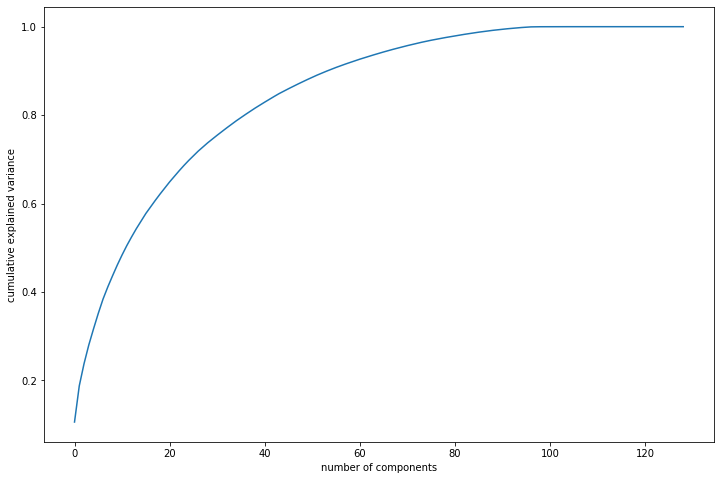

In [52]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [53]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=58)

In [54]:
X_train_pca = pd.DataFrame(pca_final.fit_transform(X_train))
X_train_pca.shape

(35102, 58)

In [55]:
#Applying selected components to the test data - 58 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8208, 58)

# Model Building

## Decision Trees

In [56]:
# Initializing decision tree
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,n_jobs=-1,scoring='recall')

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [57]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.265167,0.158748,0.018619,0.005292,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.802279,0.818001,0.808262,0.802279,0.815670,0.809298,0.006572,11
1,5.277380,0.064316,0.020954,0.002742,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.802279,0.818001,0.808262,0.802279,0.815670,0.809298,0.006572,11
2,5.246618,0.107434,0.024824,0.002967,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.801709,0.818570,0.805983,0.799715,0.816239,0.808443,0.007628,15
3,5.549696,0.259483,0.021969,0.008638,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.801709,0.818570,0.805983,0.799715,0.816239,0.808443,0.007628,15
4,8.854528,0.377277,0.021245,0.006512,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.806838,0.861863,0.880912,0.845584,0.855556,0.850150,0.024534,3
5,8.650979,0.298592,0.018395,0.001386,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.806838,0.861008,0.880912,0.845584,0.855556,0.849979,0.024454,4
6,8.499623,0.235603,0.024658,0.014025,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.796296,0.857306,0.850997,0.839031,0.849573,0.838641,0.021972,5
7,8.114024,0.244898,0.021495,0.008202,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.796296,0.857306,0.850997,0.839031,0.849573,0.838641,0.021972,5
8,3.271653,0.105291,0.018396,0.001537,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.797436,0.799487,0.818803,0.827066,0.813675,0.811293,0.011334,9
9,3.368942,0.101469,0.020587,0.004671,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.797436,0.799487,0.818803,0.827066,0.813675,0.811293,0.011334,9


In [58]:
print(grid_search.best_params_)


{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [59]:
# Instantiate the grid search model
dtree = DecisionTreeClassifier(max_depth=10,min_samples_leaf=50,min_samples_split=50,criterion='gini')

# Fit the grid search to the data
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [60]:
# Making predictions
y_pred = dtree.predict(X_test_pca)

In [61]:
confusion = confusion_matrix(y_test,y_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [62]:
print("Sensitivity:{}".format(round(TP/float(TP+FN),3)))
print("Specificity:{}".format(round(TN/float(TN+FP),3)))
print("Accuracy:{}".format(round(accuracy_score(y_test,y_pred),3)))

Sensitivity:0.802
Specificity:0.681
Accuracy:0.69


In [65]:
# importing the model
with open(r'\Users\Tabish\Desktop\rf.pkl', 'wb') as model_pkl:
    pickle.dump(dtree, model_pkl)

In [66]:
X_train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,-0.795199,-5.959482,4.714104,-2.769535,-1.848586,-0.137548,4.828731,1.980499,-0.238440,-0.358800,-0.965915,0.603617,0.754341,0.690348,-3.154395,0.097286,1.448270,-2.119774,-0.097096,-0.640107,-0.604631,-0.866153,1.398178,2.492149,-0.564009,-0.891270,-1.156032,0.202604,1.730984,-1.637450,1.847642,-0.501669,-2.149385,0.953629,-0.547845,-0.582662,0.293946,0.051675,0.417057,1.021701,-3.264592,1.614787,0.151488,-0.634299,-0.401542,1.491302,1.268604,-0.182477,0.028811,-0.143071,0.344122,-1.109866,-0.028907,0.704071,1.383880,-0.221360,0.049223,-0.503851
1,-0.685433,-0.674703,-0.353134,-1.057850,-0.632470,-2.177873,-1.465204,0.193182,0.853831,0.462523,-0.171594,-0.276721,-1.351565,0.884877,1.413855,-1.659737,0.701251,-1.273585,0.147357,-1.285051,-0.339026,-2.329829,-1.289143,-0.896542,-0.836079,-0.135734,-0.167038,1.541339,-0.309572,-0.801102,-0.764688,-0.010803,1.210647,-0.725855,0.400348,-0.291340,-0.412426,-0.100150,-0.719132,-1.137264,0.630328,0.301159,-0.912931,0.070636,-0.806029,0.300961,-0.353910,-0.246749,0.840128,-0.491333,0.212797,-0.474104,-0.160664,-0.306638,-0.450585,-0.689129,0.113140,-0.074372
2,-0.094889,-1.738211,-1.802665,0.049070,-1.145194,-2.499250,-2.263430,-0.034050,-0.131892,-0.109122,-0.358778,-0.084110,-1.266004,1.044520,0.581206,0.478023,-0.747459,0.466680,-0.191231,0.129296,0.240892,-0.216398,-0.033701,0.677689,-0.024624,1.001464,0.048431,0.231399,0.102346,0.649834,-0.210628,-0.557103,-0.208773,-0.478941,-0.242695,0.106883,-0.120440,0.020362,-0.225129,-0.859095,-0.288654,-0.355378,-0.316007,0.118903,-0.347764,-0.326306,-0.141323,-0.020298,-0.322249,0.088493,0.713770,-0.203467,0.506644,0.064592,0.424179,0.357238,0.210102,-0.172109
3,3.025342,-5.899486,2.980509,-2.347410,0.153665,0.848088,4.019307,0.939244,-0.157643,0.425992,-0.527997,-0.978394,0.199109,0.041322,-0.878249,-0.122857,0.311830,-0.115141,0.287765,-0.872683,-0.232180,-0.095079,0.229456,1.547553,0.835424,0.305669,0.075711,-0.777336,0.310153,0.337504,-0.063867,2.067426,0.961006,1.838908,-0.062358,0.580564,-0.550690,0.215337,0.676745,1.092128,-2.146581,0.450355,0.670563,-0.866574,-0.300568,-0.084150,-0.156492,0.420587,-0.271039,0.024048,0.410439,0.283023,-0.095848,0.419087,-0.132547,-0.418240,-0.096965,-0.202535
4,1.190451,0.321501,-0.546337,0.668772,-0.553364,1.092907,-2.134269,1.593022,1.218579,0.803924,-0.112564,-0.020551,-0.237742,-1.612889,-0.525183,1.009900,-1.933340,-0.387347,-0.542981,-0.275596,-0.025027,0.961665,0.546889,1.227337,-0.450217,0.112364,-0.623173,-0.074553,1.092381,-1.151190,0.354901,-0.218731,0.664828,-0.087698,0.009334,-1.241839,-0.082550,-0.548437,0.047242,-0.110421,0.473272,-0.755422,0.391967,-0.212953,0.172568,0.214659,-0.129105,-0.465311,-0.179132,0.337882,-0.393453,1.241156,-0.604835,0.296053,0.669102,0.129144,-0.288242,-0.469063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35097,0.290249,3.528961,-0.181490,-0.630093,1.896012,-2.760517,0.359849,-0.502801,0.720917,-0.531405,-0.026948,0.481282,0.122161,-0.110286,-0.541909,0.275069,0.096828,-0.833226,0.763521,-0.629721,0.017598,-0.762367,-0.386796,0.109968,-0.360744,-0.170958,0.202139,0.324858,-0.502237,-0.121081,0.134411,-0.027676,0.697863,-0.336599,-0.403726,-0.649739,-0.105683,0.161600,-0.521394,0.003265,-0.198299,-0.240842,-0.701625,-0.395576,-0.130614,-0.002023,-0.067714,0.081488,0.010488,0.161637,0.074966,-0.035319,-0.056456,-0.147511,-0.018835,0.097623,-0.072366,0.085511
35098,-1.666054,-1.812741,-0.752739,0.713013,-0.322845,-0.249054,-0.111173,-0.700359,-0.406791,0.107726,2.779735,1.291076,-0.086858,0.633473,-1.279750,0.061937,0.363629,0.071723,-0.362743,0.819722,1.236075,0.665745,-0.510527,-0.103512,0.099931,-1.05066